In [1]:
import sys
import os
import numpy as np
import random
%matplotlib qt
from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from kernels import kernel

In [2]:
def get_data(n):
    X = np.linspace(0, 4*np.pi, n)
    Y = X**2 + np.random.randn(n)
    return X, Y

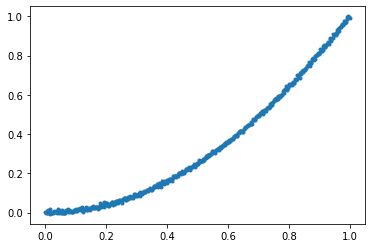

In [3]:
%matplotlib inline
N = 500
X, Y = get_data(N)

X_normalized = X/X.max()
Y_normalized = Y/Y.max()

X_normalized = np.array(X_normalized).reshape(N, 1)

plt.plot(X_normalized, Y_normalized, '.')


In [4]:
def compute_alpha(input_kernel_matrix, y):
    inverted_kernel_matrix = np.linalg.inv(input_kernel_matrix)
    return inverted_kernel_matrix.dot(y)

In [5]:
kernel = kernel.Poly(X_normalized, degree=4)
alpha = compute_alpha(kernel.input_kernel_matrix, Y_normalized)


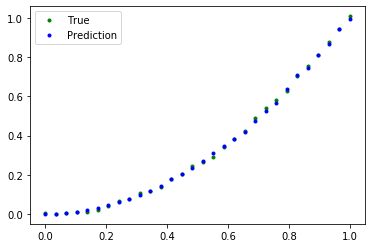

In [6]:
N = 30
X_TEST, Y_TEST = get_data(N)

X_TEST_normalized = X_TEST/X.max()
Y_TEST_normalized = Y_TEST/Y.max()

X_TEST_normalized = np.array(X_TEST_normalized).reshape(N, 1)

dec = list()
for x1 in range(0, N):
    f = np.array(X_TEST_normalized[x1])
    f = f.reshape(1, 1)
    decision = kernel.decision(f)
    decision = alpha.T.dot(decision)
    dec.append(decision[0])
    
plt.plot(X_TEST_normalized, Y_TEST_normalized, '.', c="green", label="True")
plt.plot(X_TEST_normalized, dec, '.', c="blue", label="Prediction")
leg = plt.legend();
